## Assignment 2. Pandas

All assignments in the *Pandas* section use the same data, so read the following description very carefully!

The CSV file `daily_tv_viewing_time.csv` contains the average daily viewing time in minutes for Norwegian TV channels for each of the last three years (2018, 2019 and 2020). The data for each year is broken down by age groups:

- 10-19 years
- 20-34 years
- 35-44 years
- 45-54 years
- 55-64 years
- 65-79 years
- 10-79 years

Note that the last age group (10-79 years) summarizes the viewing time for all consumers independently on their age.

The data set contains the following columns:

- `Year`: the year (2018, 2019 or 2020).
- `AgeGroup`: the age group, as described above (the word "years" is omitted from the values).
- Remaining columns: average daily viewing time in minutes for individual TV channels identified by the column name (e.g. `NRK1`). The last column (`Others`) is not related to a specific channel but summarizes the time spent watching other TV channels.

There are four big media groups in Norway: *NRK*, *TV 2*, *Discovery* and *NENT*. The CSV file `media_groups.csv` contains an overview of what channels are owned by each of these groups. Note that some channels are owned by smaller media groups and **not** included in the overview.

**Each task must be solved programmatically, i.e. you need to write Python code that uses the data files and calculates an answer. You are not allowed to change the contents of the data files.**

Tips:
- First inspect the content of both files. Then read all assignments in this section, and think about what operations you should do with the data before solving the assignments (e.g. how to merge the data, what to use as the index, you might want to add some columns and/or sort the data in a particular order, etc.)
- Pay attention to how missing values are specified in the data files.

<small>Source of data: Kantar TNS and medianorway (Department of Information Science and Media Studies, University of Bergen).</small>

You might read and pre-process the data in the following cell. Feel free to add extra cells if you need them.

In [17]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('daily_tv_viewing_time.csv' , sep=';',header = 0)
pd.options.mode.chained_assignment = None

### Assignment 2.1 (2 points)

How much time did an average consumer (in the age group 10-79 years) spend watching TV every day in 2020? Round the result to whole minutes and display it in the form "H hr MM min".

In [18]:
# ANSWER CELL 2.1 (DO NOT REMOVE OR CHANGE THIS LINE)

rows = df.shape[0]
columns=df.shape[1]
dict1 = df.to_dict(orient='records')
channel_names = ['NRK1','NRK2','NRK3/Super','TV 2','TV 2 Zebra','TV 2 Nyhetskanalen','TV 2 Humor','TV 2 Livsstil','TV 2 Sportskanalen','TV 2 Sport 1','TV 2 Sport 2','TV 2 Sport Premium 1','TV 2 Sport Premium 2','TVNorge','FEM','MAX','VOX','Eurosport Norge','TV3','V4','TV6','Matkanalen','Others']

avg=0.0
for row in range(0,rows):
    if(dict1[row]['Year'] == 2020 and dict1[row]['AgeGroup']=='10-79'):
        for ch in channel_names:
            if(dict1[row][ch]!= '-'):
                avg=avg + float(dict1[row][ch])
time = avg/(columns-2)
hours = int(time)
minutes = (time * 60) % 60
seconds = (time * 3600) % 60

print("%d hr : %02d min" % (hours, minutes))

5 hr : 07 min


### Assignment 2.2 (2 points)

What was the most popular TV channel in the age group 20-34 years in 2019?

In [19]:
# ANSWER CELL 2.2 (DO NOT REMOVE OR CHANGE THIS LINE)

rows = df.shape[0]
columns=df.shape[1]
dict1 = df.to_dict(orient='records')
channel_names = ['NRK1','NRK2','NRK3/Super','TV 2','TV 2 Zebra','TV 2 Nyhetskanalen','TV 2 Humor','TV 2 Livsstil','TV 2 Sportskanalen','TV 2 Sport 1','TV 2 Sport 2','TV 2 Sport Premium 1','TV 2 Sport Premium 2','TVNorge','FEM','MAX','VOX','Eurosport Norge','TV3','V4','TV6','Matkanalen','Others']

val=0
popular = 0
for row in range(0,rows):
    if(dict1[row]['Year'] == 2019 and dict1[row]['AgeGroup']=='20-34'):
        for ch in channel_names:
            if(dict1[row][ch]!= '-'):
                val = float(dict1[row][ch])
                if(val > popular):
                    popular = val
                    pop = ch
print("Most Popular Channel in the age group 20-34 in 2019 is",pop)

Most Popular Channel in the age group 20-34 in 2019 is TV 2


### Assignment 2.3 (2 points)

How much time (in minutes) did an average consumer in each age group spend watching TV every day in 2020? (Do not include the 10-79 group.)

Present the results in the tabular form and as a horizontal bar plot.

AgeGroup  Average Time Spent
   10-19            1.173043
   20-34            1.607391
   35-44            3.300870
   45-54            6.398261
   55-64            8.463913
   65-79           11.664348


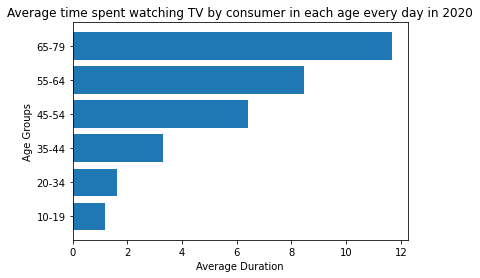

In [20]:
# ANSWER CELL 2.3 (DO NOT REMOVE OR CHANGE THIS LINE)

rows = df.shape[0]
columns=df.shape[1]
dict1 = df.to_dict(orient='records')
column_names = ['NRK1','NRK2','NRK3/Super','TV 2','TV 2 Zebra','TV 2 Nyhetskanalen','TV 2 Humor','TV 2 Livsstil','TV 2 Sportskanalen','TV 2 Sport 1','TV 2 Sport 2','TV 2 Sport Premium 1','TV 2 Sport Premium 2','TVNorge','FEM','MAX','VOX','Eurosport Norge','TV3','V4','TV6','Matkanalen','Others']
AgeGroup = ['10-19','20-34','35-44','45-54','55-64','65-79']

avg=0.0
avgs = []
min = []
for row in range(0,rows):
    if(dict1[row]['Year'] == 2020 and dict1[row]['AgeGroup'] != '10-79'):        
        res = 0
        for col in column_names:
            if(dict1[row][col]  != '-'):
                res=res+ float(dict1[row][col])
        avgs.append(res/(columns-2))       
table = {'AgeGroup': AgeGroup, 'Average Time Spent': avgs}
df1 = pd.DataFrame(table)
print(df1.to_string(index=False))

x = np.array(AgeGroup)
y = np.array(avgs)
plt.xlabel("Average Duration")
plt.ylabel("Age Groups")
plt.title("Average time spent watching TV by consumer in each age every day in 2020")
plt.barh(x,y)
plt.show()

### Assignment 2.4 (2 points)

Calculate the market shares of all channels in each year.

Market share of a channel is the channel's average viewing time (in the age group 10-79 years) divided by the sum of the average viewing times for all channels, and converted to percents.

Hint: If you need to perform element-wise division of all columns of a dataframe by a series, you can use the [div](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.div.html) method with `axis=0`.

What was the market share of NRK1 in 2020?

In [21]:
# ANSWER CELL 2.4 (DO NOT REMOVE OR CHANGE THIS LINE)

import time
df = pd.read_csv('daily_tv_viewing_time.csv', sep=';',header = 0)
df["TV 2 Humor"] = [float(str(i).replace("-", "0")) for i in df["TV 2 Humor"]]
df["TV 2 Sportskanalen"] = [float(str(i).replace("-", "0")) for i in df["TV 2 Sportskanalen"]]
df["TV 2 Sport Premium 1"] = [float(str(i).replace("-", "0")) for i in df["TV 2 Sport Premium 1"]]
df["TV 2 Sport Premium 2"] = [float(str(i).replace("-", "0")) for i in df["TV 2 Sport Premium 2"]]
df[['NRK1','NRK2','NRK3/Super','TV 2','TV 2 Zebra','TV 2 Nyhetskanalen','TV 2 Humor','TV 2 Livsstil','TV 2 Sportskanalen','TV 2 Sport 1','TV 2 Sport 2','TV 2 Sport Premium 1','TV 2 Sport Premium 2','TVNorge','FEM','MAX','VOX','Eurosport Norge','TV3','V4','TV6','Matkanalen','Others']]=df[['NRK1','NRK2','NRK3/Super','TV 2','TV 2 Zebra','TV 2 Nyhetskanalen','TV 2 Humor','TV 2 Livsstil','TV 2 Sportskanalen','TV 2 Sport 1','TV 2 Sport 2','TV 2 Sport Premium 1','TV 2 Sport Premium 2','TVNorge','FEM','MAX','VOX','Eurosport Norge','TV3','V4','TV6','Matkanalen','Others']].apply(pd.to_numeric, errors='ignore')
df['Sum']=df.loc[:,'NRK1':'Others'].sum(axis=1)

dict2=df.copy()
dict2.set_index(['Year','AgeGroup'], inplace = True)

da18 = dict2.loc[[(2018, "10-79")]]
da19 = dict2.loc[[(2019, "10-79")]]
da20 = dict2.loc[[(2020, "10-79")]]

s18 = dict2.loc[(2018, "10-79")]["Sum"]
s19 = dict2.loc[(2019, "10-79")]["Sum"]
s20 = dict2.loc[(2020, "10-79")]["Sum"]

CH18 = da18.loc[:,"NRK1":"Others"]
CH19 = da19.loc[:,"NRK1":"Others"]
CH20 = da20.loc[:,"NRK1":"Others"]

mshare18 = CH18.div(s18)
mshare19 = CH19.div(s19)
mshare20 = CH20.div(s20)
mshare = pd.concat([mshare18, mshare19, mshare20])

display(mshare)
display(mshare20[["NRK1"]])


,,NRK1,NRK2,NRK3/Super,TV 2,TV 2 Zebra,TV 2 Nyhetskanalen,TV 2 Humor,TV 2 Livsstil,TV 2 Sportskanalen,TV 2 Sport 1,...,TVNorge,FEM,MAX,VOX,Eurosport Norge,TV3,V4,TV6,Matkanalen,Others
Year,AgeGroup,,,,,,,,,,,,,,,,,,,,,
2018,10-79,0.304751,0.049953,0.023993,0.189821,0.015969,0.036973,0.005979,0.009991,0.004012,0.001023,...,0.078902,0.019981,0.028949,0.021004,0.009991,0.038940,0.018958,0.015969,0.001967,0.120909
2019,10-79,0.319356,0.053055,0.021992,0.187233,0.018997,0.035085,0.005990,0.011980,0.000000,0.005990,...,0.056050,0.021051,0.026014,0.024046,0.008985,0.042016,0.018997,0.015061,0.001968,0.109105
2020,10-79,0.357397,0.051069,0.019002,0.169155,0.016033,0.043010,0.000000,0.010010,0.000000,0.006023,...,0.052087,0.019002,0.022989,0.024007,0.008992,0.041059,0.017051,0.012979,0.002036,0.114099


,,NRK1
Year,AgeGroup,
2020,10-79,0.357397


### Assignment 2.5 (2 points + possibility for 1 bonus point)

Visualize the market shares you calculated in the previous assignment in a bar plot. Rotate the labels by 90 degrees and add a suitable title for the figure.

Your plot should be similar to the plot depicted below. Note that the y-axis labels and the grid have been removed in order not to reveal the answer to the previous assignment. Your plot must include the y-axis labels. You might use any order of channels on the x-axis (unless you are attempting to solve the bonus point challenge) as well as any colors representing different years.

![](channel_shares.png)

Hint: Check out the `hue` parameter of [`sns.barplot`](https://seaborn.pydata.org/generated/seaborn.barplot.html).

#### Bonus point challenge (optional)

Sort the channels in the figure by their market shares in 2020 (in the descending order) with the exception of *Others*, that must be placed at the end, as shown in the figure above.

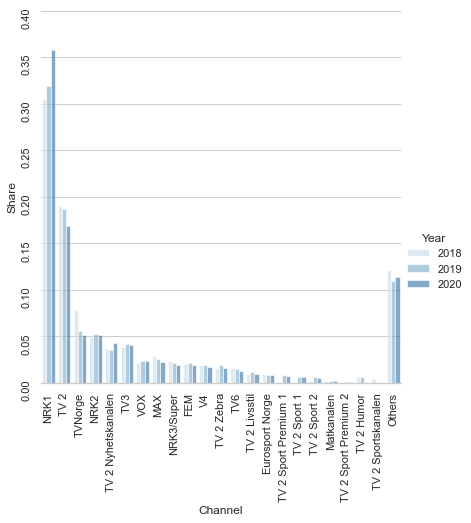

In [22]:
# ANSWER CELL 2.5 (DO NOT REMOVE OR CHANGE THIS LINE)
import seaborn as sns
mshare_r = mshare.reset_index() 

mshare_m = mshare_r.melt(id_vars=["Year", "AgeGroup"],var_name="Channel",value_name="mshare")
mshare_m20 = mshare_m[mshare_m["Year"] == 2020]
mshare_m20['max'] = mshare_m20.groupby('Channel')['mshare'].transform('max')
mshare_m20 = mshare_m20.sort_values(["max","mshare"], ascending=False).drop('max', axis=1)
mshare_m20_Order = mshare_m20['Channel'].tolist()

mshare_m20_Order.remove('Others')
mshare_m20_Order.append('Others')

mshare_m20_Order
sns.set_theme(style="whitegrid")
sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)

plot2 = sns.catplot(
    data=mshare_m, kind="bar",
    x="Channel", y="mshare", hue="Year",
    ci="sd", palette="Blues", alpha=.6, height=6,
    order=mshare_m20_Order)

plot2.despine(left=True)
plot2.set_axis_labels("Channel", "Share")
plot2.set_xticklabels(rotation=90)
plot2.set_yticklabels(rotation=90)

### Assignment 2.6 (2 points)

Calculate the market shares for all media groups for each year and present them in a tabular form using rows for the years and columns for the groups.

The dataset with viewing times and the dataset with groups must be merged programmatically; your code must work even if the CSV files contain data for TV channels and media groups from other countries.

Remember that some TV channels do not belong to any of the four main media groups in Norway. Use a special group named *Others* for these channels.

In [23]:
# ANSWER CELL 2.6 (DO NOT REMOVE OR CHANGE THIS LINE)

mgdf= pd.read_csv("media_groups.csv", delimiter=";")
mgdf = mgdf.T
mgdf.columns = mgdf.iloc[0]
mgdf = mgdf.drop(["Channel"], axis="index")
mgdf.index.names = ["Group"]
#display(media_groups_df)

group_share_df = pd.concat([mgdf, mshare])
#display(group_share_df)
group_share_df = group_share_df.fillna("Others")

group_share_df= group_share_df.T
#display(group_share_df)

group_share_df.columns = ["Group", "2018", "2019", "2020"]

final_group_table = group_share_df.groupby("Group") \
    .agg(Y2018=("2018", "sum"), Y2019=("2019", "sum"), Y2020=("2020", "sum")) \
    .sort_values("Group", ascending=False)

final_group_table= final_group_table.T
print("Market Share for Each Grooup in Each Year: ")
display(final_group_table)

Market Share for Each Grooup in Each Year: 


Group,TV 2,Others,NRK,NENT,Discovery
Y2018,0.265733,0.122876,0.378697,0.073867,0.158826
Y2019,0.282304,0.111073,0.394404,0.076074,0.136146
Y2020,0.258229,0.116135,0.427469,0.071089,0.127078
